In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df = pd.read_csv("data\\sugar_consumption_dataset.csv")
df.head()

,Country,Year,Country_Code,Continent,Region,Population,GDP_Per_Capita,Per_Capita_Sugar_Consumption,Total_Sugar_Consumption,Sugar_From_Sugarcane,...,Obesity_Rate,Sugar_Imports,Sugar_Exports,Avg_Retail_Price_Per_Kg,Gov_Tax,Gov_Subsidies,Education_Campaign,Urbanization_Rate,Climate_Conditions,Sugarcane_Production_Yield
0,France,1972,FRA,Europe,Western Europe,2.617306e+08,8692.631696,12.827741,3.357413e+06,68.422963,...,34.094017,5.401670e+06,2.358929e+06,3.864020,0.0,0,0.0,34.503398,3,52.433972
1,Australia,2003,AUS,Oceania,Australia & New Zealand,1.737965e+08,6859.195960,21.362632,3.712750e+06,55.432564,...,16.040118,3.418790e+06,9.694348e+06,3.282101,0.0,0,0.0,31.783067,4,58.382055
2,Germany,1963,DEU,Europe,Western Europe,1.236366e+08,22075.950575,32.077485,3.965951e+06,86.466120,...,14.405741,8.987281e+06,5.451632e+06,1.097687,0.0,0,0.0,51.551345,1,32.184735
3,France,1965,FRA,Europe,Western Europe,2.989961e+08,3728.027392,47.648930,1.424685e+07,69.806707,...,38.499271,5.179004e+06,8.048500e+06,2.761297,0.0,0,0.0,80.386281,2,84.296019
4,Germany,2010,DEU,Europe,Western Europe,7.341531e+06,40420.973962,23.214343,1.704288e+05,63.772278,...,36.190977,6.463439e+06,7.062910e+06,4.219431,0.0,0,1.0,49.701153,3,66.110815


In [8]:
#Limpieza previa. Se cambiará posteriormente cuando se trabaje con el dataset limpio
df.info()
df.describe()
df.isnull().sum()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       10000 non-null  object 
 1   Year                          10000 non-null  int64  
 2   Country_Code                  10000 non-null  object 
 3   Continent                     10000 non-null  object 
 4   Region                        10000 non-null  object 
 5   Population                    10000 non-null  float64
 6   GDP_Per_Capita                10000 non-null  float64
 7   Per_Capita_Sugar_Consumption  10000 non-null  float64
 8   Total_Sugar_Consumption       10000 non-null  float64
 9   Sugar_From_Sugarcane          10000 non-null  float64
 10  Sugar_From_Beet               10000 non-null  float64
 11  Sugar_From_HFCS               10000 non-null  float64
 12  Sugar_From_Other              10000 non-null  float64
 13  Pr

In [9]:
#4. Seleccionar características (X) y variable objetivo (y)
X = df[['Year']]  
y = df['Total_Sugar_Consumption']  

In [10]:
#6. Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#7. Seleccionar y entrenar un modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
#8. Hacer predicciones
y_pred = model.predict(X_test)

In [13]:
#9. Evaluar el modelo

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 20913246732529.246
R2 Score: -0.0009262775934224532


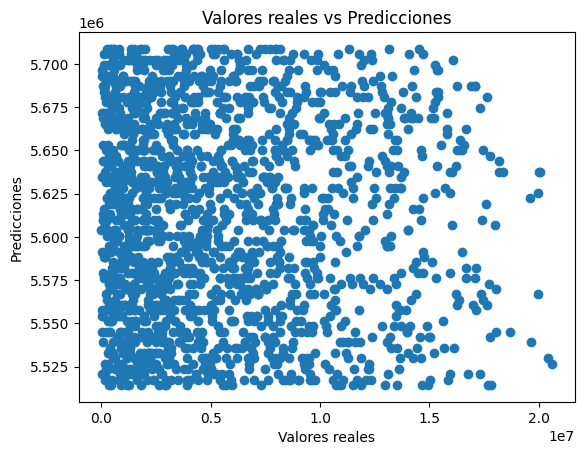

In [14]:
#10. (Opcional) Visualizar resultados

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs Predicciones")
plt.show()